Биометрическая верификация личности. 

_Верификация_ – процесс подтверждения личности на основе биометрических характеристик, например, по отпечаткам пальцев, голосу или изображению лица. Алгоритм верификации сравнивает пару _биометрических образцов_ (эталонный и тестовый) и дает бинарный ответ о тождестве или различии личностей.

Чаще всего биометрические образцы представляют собой вектора евклидова пространства.

<img src="https://www.pyimagesearch.com/wp-content/uploads/2018/06/face_recognition_opencv_embedding.jpg" width=400>

В этом случае использование евклидовой метрики представляется естественным способом измерения сходства двух образцов. Пусть даны два биометрических образца  $x_{i},x_{j} \in \mathbb{R}^{d}$. 

Тогда решение о совпадение личностей принимается, если квадрат расстояния между ними 

$$ d^{2} ( x_{i},x_{j}) = \Vert x_{i}-x_{j} \Vert ^{2}= ( x_{i}-x_{j} )^{T} ( x_{i}-x_{j}) $$

не превосходит заранее заданное пороговое значение,  $ \tau $. Возведение метрики в квадрат нужно исключительно для удобства и не влияет на решения, принимаемые биометрической системой. Однако, обычно, не все пары биометрических образцов, принадлежащих одной личности, находятся близко (в смысле евклидовой метрики) друг другу. Точнее, правило 

"_Если пара  $  ( i,j)  $ представляет одну личность, то  $ d^{2} ( x_{i},x_{j} ) < \tau $ . Если пара  $ ( i,k) $ представляет разные личности, то  $ d^{2} ( x_{i},x_{k} ) > \tau $_" 

часто нарушается. В результате возникает задача найти такое отображение  $ g: \mathbb{R}^{d} \to \mathbb{R}^{m} $, чтобы для образов исходных биометрических образцов это правило нарушалось как можно реже. На рисунке ниже слева показаны исходные образцы,  $x$ , а справа их образы,  $ x=g(x)$.

<img src="http://ml.cecs.ucf.edu/sites/default/files/Drawing1_0.jpg">

Далее ограничимся линейными отображениями  $ g (x) =Lx $, где  $ L \in \mathbb{R}^{m \times d} $.

Запишем квадрат евклидовой метрики для образов: 

$$ d^{2} ( x_{i},x_{j} ) = \Vert x_{i}-x_{j} \Vert ^{2}= \Vert Lx_{i}-Lx_{j} \Vert ^{2}= ( x_{i}-x_{j} )^{T} L^{T} L ( x_{i}-x_{j} ) $$

Вводя обозначение  $ M=L^{T}L $ , получаем т.н. метрику Махаланобиса, которая является обобщением евклидовой метрики:

$$ d_{M}^{2} ( x_{i},x_{j} ) = ( x_{i}-x_{j} ) ^{T}M ( x_{i}-x_{j} )  $$

Тогда задача поиска матрицы  $ L $  сводится к задаче поиска такой матрицы  $ M \in \mathbb{S}_{+}^{d} $ , чтобы правило

"_Если пара  $  ( i,j)  $  представляет одну личность, то $ d_{M}^{2} ( x_{i},x_{j}) - \tau<0 $ . Если пара  $  ( i,k)  $  представляет разные личности, то  $ d_{M}^{2} ( x_{i},x_{k} ) - \tau>0 $_"

нарушалось как можно реже. Так как удобнее работать с функциями, измеряющими сходство, а не различие, определим оценку сходства следующим образом:

$$ s_{M, \tau} ( x_{i},x_{j} ) = \tau-d_{M}^{2} ( x_{i},x_{j} ) $$

Оценка сходства зависит от параметров  $ \theta = \{ M, \tau \}  $ , которые необходимо оценить на некоторой выборке биометрических образцов. Поскольку значения параметров не ограничены сверху (умножение параметров на положительную константу не меняет решений биометрической системы), имеет смысл сформулировать задачу их оценки как следующую задачу оптимизации с ограничениями:

\begin{matrix}
 \underset{M, \tau}{\text{min }} \mathrm{tr}( M) \\
\text{s.t. } y_{ij}s_{M, \tau} ( x_{i},x_{j} )  \geq 0\\
M\succcurlyeq0, \tau \geq 0\\
\end{matrix}

где  $ y_{ij}=1 $ , если пара  $( i,j) $  представляет одну личность, и $ y_{ij}=-1 $  в противном случае. Легко заметить, что решением этой задачи будут параметры с нулевыми значениями. Чтобы избавиться от этой проблемы, потребуем, чтобы неравенства выполнялись с некоторым "зазором", например, с единичным:

\begin{matrix}
 \underset{M, \tau}{\text{min }} \mathrm{tr}( M) \\
\text{s.t. } y_{ij}s_{M, \tau} ( x_{i},x_{j} )  \geq 1\\
M\succcurlyeq0, \tau \geq 0\\
\end{matrix}

Однако на практике система неравенств в ограничениях может оказаться несовместной - не существует таких параметров, которые бы удовлетворяй данному набору ограничений, т.е. множество допустимых решений пусто. В этом случае обычно "ослабляют" неравенства, вводя новые переменные:

\begin{matrix}
 \underset{M, \tau, \xi_{ij}}{\text{min }} \lambda\mathrm{tr}( M) + \frac{1}{N^{2}} \sum _{i=1}^{N} \sum _{j=1}^{N} \xi_{ij}\\
\text{s.t. } y_{ij}s_{M, \tau} ( x_{i},x_{j} )  \geq 1 - \xi_{ij}\\
\xi_{ij} \geq 0\\
M\succcurlyeq0, \tau \geq 0\\
\end{matrix}

Здесь  $ N $  - объем выборки, а $ \lambda $  - заранее заданная константа. Перейдем к эквивалентной задаче, чтобы избавиться от дополнительных переменных:

\begin{matrix}
 \underset{M, \tau}{\text{min }} \lambda\mathrm{tr}( M) + \frac{1}{N^{2}} \sum _{i=1}^{N} \sum _{j=1}^{N} \mathrm{max} (0, 1 - y_{ij}s_{M, \tau} ( x_{i},x_{j} ))\\
\text{s.t. } M\succcurlyeq0, \tau \geq 0\\
\end{matrix}

и заменим не дифференцируемую функцию $ \mathscr{l}_\text{hinge} \left( t \right) = \mathrm{max} ( 0,1-t)  $  на  $ \mathscr{l}_\text{logistic} (t) = \log ( 1+\exp ( -t) ) $ .

<img src="http://fa.bianp.net/talks/trento_may_2015/img/logistic.svg" width=500>

Второе слагаемое в целевой функции можно интерпретировать как средний "штраф" за невыполнение неравенства  $ y_{ij}s_{M, \tau} ( x_{i},x_{j} )  \geq 0 $

Итоговая задача:

\begin{matrix}
 \underset{M, \tau}{\text{min }} \lambda\mathrm{tr}( M) + \frac{1}{N^{2}} \sum _{i=1}^{N} \sum _{j=1}^{N} \mathscr{l}_\text{logistic}  (y_{ij}s_{M, \tau} ( x_{i},x_{j} ))\\
\text{s.t. } M\succcurlyeq0, \tau \geq 0\\
\end{matrix}

Эту задачу можно решить методом проекции градиента. В этом случае проекция матрицы  $ M $  на конус положительно полуопределенных матриц  $ \mathbb{S}_{+}^{d} $  вычисляется следующим образом:

$$  \Pi _{\mathbb{S}_{+}^{d}} ( M ) = U \mathrm{diag} (  [ \mathrm{max}( 0,v_{1} ) , \mathrm{max}( 0,v_{2} ) , \ldots , \mathrm{max}( 0,v_{d} )  ]  ) U^{T} $$

где столбцы матрицы  $ U $  являются собственными векторами матрицы  $ M $ , а  $ v_{i} $  - ее собственными числами, т.е.  $ M = U \mathrm{diag} (  [ v_{1},v_{2}, \ldots ,v_{d} ] ) U^{T} $.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [130]:
from sklearn.model_selection import train_test_split

dim = 2

mx = [0,5,10]
my = [10,5,0]

label_matrix = np.array([[0,1,2], [1,2,3], [2,3,4]])
#label_matrix = np.fliplr(np.array([[0,1,2], [1,2,3], [2,3,4]]))
#label_matrix = np.array([[0,1,2], [0,1,2], [0,1,2]])
#label_matrix = np.array([[0,0,1], [0,1,2], [1,2,2]])

data = np.zeros((0,dim))
labels = np.zeros((0,), dtype=int)

n = 100

std = 1.
for i  in range(3):
    for j in range(3):
        mu = np.array([mx[j], my[i]])
        data = np.vstack((data, std*np.random.randn(n,dim) + mu))
        labels = np.hstack((labels, label_matrix[j,i]*np.ones((n,), dtype=int)))

X, X_test, y, y_test = train_test_split(data, labels, test_size=0.33, random_state=42, stratify=labels)

print(X.shape, X_test.shape)

(603, 2) (297, 2)


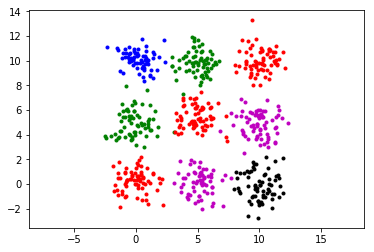

In [131]:
color = ['b','g','r','m','k']    
for k in np.unique(y):
    plt.plot(X[y==k,0], X[y==k,1], color[k]+'.')
    
plt.axis('equal')    
plt.show()

In [132]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y)
Y = lb.transform(y)

Z = 2*np.dot(Y, Y.T) - 1

In [133]:
from scipy.special import expit

def log_loss(x):   return np.logaddexp(0., -x)
def softplus(x):   return np.logaddexp(0., x)
def hinge_loss(x):   return np.maximum(0., 1. - x)
def sigmoid(x):   return expit(x)


def unpack_params(theta):
    dim = np.int32(np.sqrt(theta.size-1))
    b = theta[0]
    M = theta[1:].reshape((dim, dim))
    return b, M

def pack_params(b,M):
    dim = M.shape[0]    
    theta = np.zeros((1+dim*dim,))
    theta[0] = b
    theta[1:] = M.flatten()
    return theta
    

def regularized_risk(theta, X, Z, lmbda=0.01):  
    N,dim = X.shape
    b, M = unpack_params(theta)
    
    ss = np.sum(np.dot(X,M)*X, axis=1, keepdims=True)
    S = b - ss - ss.T + np.dot(np.dot(X,M),X.T)
    
    #loss = np.mean(log_loss(Z*S)) + 0.5*lmbda*np.sum(theta**2)
    loss = np.mean(log_loss(Z*S)) + lmbda*np.trace(M)
    
    G = -Z*sigmoid(-Z*S)
    #G = -Z*(Z*S < 1.)
    
    XG = X*np.sum(G,axis=1, keepdims=True)
    XGT = X*np.sum(G.T,axis=1, keepdims=True)
    grad_M = X.T.dot(G).dot(X) - X.T.dot(XG) - X.T.dot(XGT)
    grad_M = lmbda*np.eye(dim) + 1./N/N*grad_M
    grad_b = 1./N/N*np.sum(G)
    grad = pack_params(grad_b, grad_M)
    
    return loss, grad   


In [134]:
from scipy.optimize import check_grad

L = np.random.randn(dim,dim)
b_0 = np.random.rand()
M_0 = np.dot(L, L.T)
theta_0 = pack_params(b_0, M_0)

func = lambda w: regularized_risk(w, X, Z, 0.0)[0]
grad = lambda w: regularized_risk(w, X, Z, 0.0)[1]

diff = check_grad(func, grad, theta_0)
print(diff)

2.3401681566897726e-06


In [135]:
def projection_psd(X):
    """Projection onto positive semidefinite cone."""
    es, U = np.linalg.eig(X)
    es[es<0] = 0.
    return U.dot(np.diag(es).dot(U.T))

def projection(theta):    
    b,M = unpack_params(theta)    
    b = np.maximum(0., b)
    M = projection_psd(M)    
    theta_projected = pack_params(b, M)
    return theta_projected

In [136]:
def projected_gradient_descent(func_and_grad, x0, proj=lambda x: x, maxiters=100):
    """Projected gradient descent."""
    x = x0
    _,grad = func_and_grad(x0)
    step = np.minimum(0.01, 1.0 / np.linalg.norm(grad))
    for iteration in range(maxiters):
        f,grad = func_and_grad(x)
        x = proj(x - step * grad)
        step = step*0.999
        if iteration % 100 == 0:
            print('Iter: %6d, obj: %f' % (iteration, f))        
    return x

In [137]:
np.random.seed(1)
L = np.random.randn(dim,dim)
b_0 = np.random.rand()
M_0 = np.dot(L, L.T)
theta_0 = pack_params(b_0, M_0)

objective = lambda w: regularized_risk(w, X, Z, 0.001)

theta_opt = projected_gradient_descent(objective, theta_0, proj=projection, maxiters=3000)

Iter:      0, obj: 51.582607
Iter:    100, obj: 0.456648
Iter:    200, obj: 0.457187
Iter:    300, obj: 0.457518
Iter:    400, obj: 0.457640
Iter:    500, obj: 0.457527
Iter:    600, obj: 0.457157
Iter:    700, obj: 0.456511
Iter:    800, obj: 0.455572
Iter:    900, obj: 0.454329
Iter:   1000, obj: 0.452778
Iter:   1100, obj: 0.450932
Iter:   1200, obj: 0.448822
Iter:   1300, obj: 0.446504
Iter:   1400, obj: 0.444064
Iter:   1500, obj: 0.441611
Iter:   1600, obj: 0.439260
Iter:   1700, obj: 0.437117
Iter:   1800, obj: 0.435253
Iter:   1900, obj: 0.433696
Iter:   2000, obj: 0.432436
Iter:   2100, obj: 0.431439
Iter:   2200, obj: 0.422039
Iter:   2300, obj: 0.422032
Iter:   2400, obj: 0.422027
Iter:   2500, obj: 0.422022
Iter:   2600, obj: 0.422017
Iter:   2700, obj: 0.422013
Iter:   2800, obj: 0.422010
Iter:   2900, obj: 0.422006


In [138]:
theta_opt = projection(theta_opt)

b, M = unpack_params(theta_opt)

M = M + np.eye(dim)*1e-3

Получим матрицу преобразования $L$ с помощью [разложения Холецкого](https://ru.wikipedia.org/wiki/Разложение_Холецкого)

In [139]:
L = np.linalg.cholesky(M) # L * L.T = M

X_test_transformed = np.dot(X_test, L)

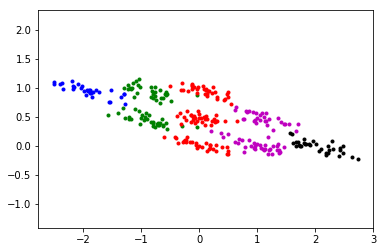

In [140]:
for k in np.unique(y):
    plt.plot(X_test_transformed[y_test==k,0], X_test_transformed[y_test==k,1], color[k]+'.')
    
plt.axis('equal')    
plt.show()